#Exercise




Predict bike rental count (daily) based on the environmental & seasonal settings. This dataset contains the daily count of rental bikes between years 2011 and 2012 in Capital bikeshare system with the corresponding weather and seasonal information. 




Bike-sharing rental process is highly correlated to the environmental and seasonal settings. For instance, weather conditions, precipitation, day of week, season, hour of the day, etc. can affect the rental behaviors. 




Conduct the DNN analysis and improve the performance of the model using different archictecture. 




Columns Details:

1. Instant - Record Index

2. dteday - Date (Format: YYYY-MM-DD)

3. season - Season (1:   springer, 2: summer, 3: fall, 4: winter)

4. yr - Year (0: 2011,   1:2012)

5. mnth - Month (1 to 12)

6. holiday - Weather day is holiday or not

7. weekday - Day of the week

8. workingday - Working Day: If day is neither weekend nor holiday is 1, otherwise is 0

9. weathersit - Weather Situation (1: Clear/Few clouds; 2: Mist/Cloudy; 3: Light Snow/Light Rain; 4: Heavy Rain/Ice Pallets/Thunderstorm/Snow)

10. temp - Normalized temperature in Celsius. 

11. atemp - Normalized feeling temperature in Celsius. 

12. hum - Normalized humidity. 

13. windspeed - Normalized wind speed. 

14. casual - Count of casual users

15. registered - Count of registered users

16. cnt - Count of total rental bikes including both casual and registered

In [1]:
# Mounting the Drive to Google Colab
from google.colab import data_table
from google.colab import drive

drive.mount('/drive')

Mounted at /drive


In [2]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

In [3]:
# Import data
# Define the path
path = "/drive/MyDrive/Colab Notebooks/bike.csv"
df = pd.read_csv(path)

# Explore Dataset

In [4]:
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,1/1/2011,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,1/2/2011,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,1/3/2011,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,1/4/2011,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,1/5/2011,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [5]:
df.shape

(731, 16)

In [6]:
df.columns

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')

In [7]:
# Checking missing values for each feature/column
df.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [10]:
# Drop irrelavant columns
df1 = df.drop(['instant',	'dteday'], axis = 1)

# as record index and date does not affect the bike rental

# Split Dataset

In [11]:
X = df1.drop(['cnt'], axis = 1)
Y = df1['cnt']

In [12]:
# Split dataset
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size = 0.20, random_state =0)

print("X_train shape", X_train.shape)
print("y_train shape", Y_train.shape)
print("X_test shape", X_test.shape)
print("y_test shape", Y_test.shape)

# SPlit into 80/20

X_train shape (584, 13)
y_train shape (584,)
X_test shape (147, 13)
y_test shape (147,)


# Building the model

In [13]:
from keras.models import Sequential
from keras.layers import Dense

L1=200
L2=100
L3=50

model = Sequential()
model.add(Dense(L1,input_dim=13,activation='relu')) #input dimension equal to pixel
model.add(Dense(L2,activation='relu'))
model.add(Dense(L3,activation='relu'))

# output layer 
model.add(Dense(1, activation='linear')) 

In [14]:
#Compiling the sequantial model
model.compile(loss = 'mse', metrics = ['mae'], optimizer = 'adam')

In [16]:
history = model.fit(X_train, Y_train, epochs =10, batch_size = 100, validation_data = (X_test, Y_test))

Epoch 1/10
6/6 [==============================] - 1s 39ms/step - loss: 15838112.0000 - mae: 3623.0933 - val_loss: 9648520.0000 - val_mae: 2801.5317
Epoch 2/10
6/6 [==============================] - 0s 7ms/step - loss: 5726417.0000 - mae: 2123.8464 - val_loss: 1871025.2500 - val_mae: 1144.8044
Epoch 3/10
6/6 [==============================] - 0s 7ms/step - loss: 769772.4375 - mae: 662.5563 - val_loss: 859230.2500 - val_mae: 775.7576
Epoch 4/10
6/6 [==============================] - 0s 7ms/step - loss: 1273898.1250 - mae: 955.9459 - val_loss: 1082399.5000 - val_mae: 859.7946
Epoch 5/10
6/6 [==============================] - 0s 7ms/step - loss: 616502.0000 - mae: 650.8928 - val_loss: 214007.2656 - val_mae: 347.2467
Epoch 6/10
6/6 [==============================] - 0s 7ms/step - loss: 252433.6406 - mae: 348.2009 - val_loss: 396225.7500 - val_mae: 457.5484
Epoch 7/10
6/6 [==============================] - 0s 7ms/step - loss: 297988.5938 - mae: 398.8397 - val_loss: 177330.6719 - val_mae: 297

<Figure size 640x480 with 0 Axes>

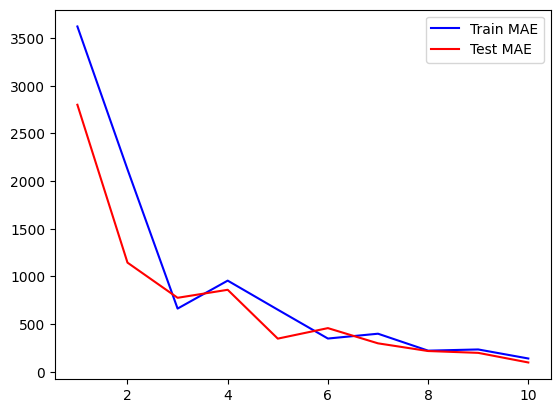

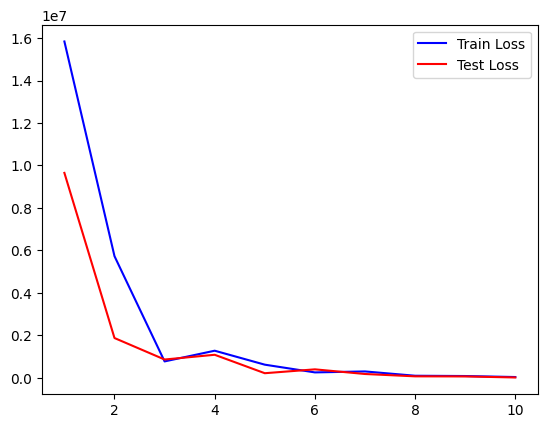

<Figure size 640x480 with 0 Axes>

In [17]:
mae2 = history.history['mae']
val_mae = history.history['val_mae']
loss2 = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(mae2)+1)

plt.plot(epochs, mae2, 'b', label = 'Train MAE')
plt.plot(epochs, val_mae, 'r', label = 'Test MAE')
plt.legend()
plt.figure()

plt.plot(epochs, loss2, 'b', label = 'Train Loss')
plt.plot(epochs, val_loss, 'r', label = 'Test Loss')
plt.legend()
plt.figure()

### Model with initializer and regularizer ###

Epoch 1/10
6/6 [==============================] - 1s 34ms/step - loss: 12693719.0000 - mae: 3223.6831 - val_loss: 4462193.0000 - val_mae: 1921.7262
Epoch 2/10
6/6 [==============================] - 0s 10ms/step - loss: 1599289.8750 - mae: 981.3969 - val_loss: 153371.9531 - val_mae: 335.4455
Epoch 3/10
6/6 [==============================] - 0s 7ms/step - loss: 865741.9375 - mae: 816.8033 - val_loss: 1345035.7500 - val_mae: 1056.1764
Epoch 4/10
6/6 [==============================] - 0s 12ms/step - loss: 777697.6875 - mae: 777.5406 - val_loss: 93801.7969 - val_mae: 256.1803
Epoch 5/10
6/6 [==============================] - 0s 8ms/step - loss: 64597.5625 - mae: 198.2905 - val_loss: 206527.0312 - val_mae: 394.4257
Epoch 6/10
6/6 [==============================] - 0s 8ms/step - loss: 236755.3906 - mae: 428.3507 - val_loss: 191986.6094 - val_mae: 382.7099
Epoch 7/10
6/6 [==============================] - 0s 9ms/step - loss: 90541.3281 - mae: 233.6687 - val_loss: 9623.1729 - val_mae: 78.0379
E

<Figure size 640x480 with 0 Axes>

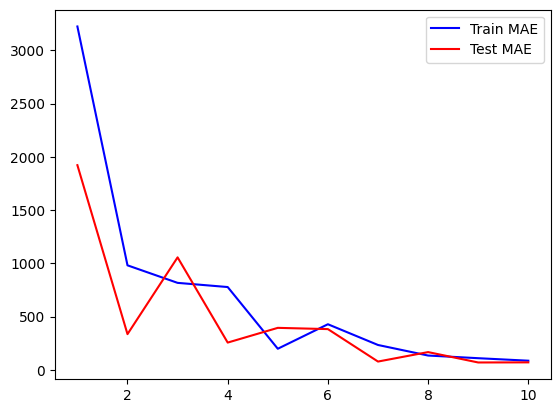

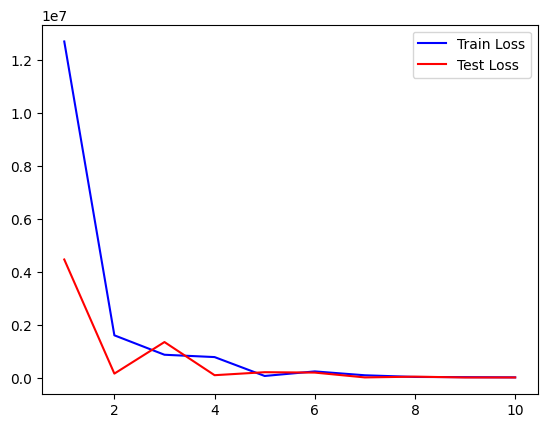

<Figure size 640x480 with 0 Axes>

In [24]:
from keras import initializers
from keras import regularizers


from keras.models import Sequential
from keras.layers import Dense

L1=200
L2=100
L3=50

model = Sequential()
model.add(Dense(L1,input_dim=13,activation='relu',
                kernel_initializer='he_normal', kernel_regularizer= regularizers.l1(0.01))) #input dimension equal to pixel
model.add(Dense(L2,activation='relu'))
model.add(Dense(L3,activation='relu'))

# output layer 
model.add(Dense(1, activation='linear')) 

#Compiling the sequantial model
model.compile(loss = 'mse', metrics = ['mae'], optimizer = 'adam')

history = model.fit(X_train, Y_train, epochs =10, batch_size = 100, validation_data = (X_test, Y_test))

mae2 = history.history['mae']
val_mae = history.history['val_mae']
loss2 = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(mae2)+1)

plt.plot(epochs, mae2, 'b', label = 'Train MAE')
plt.plot(epochs, val_mae, 'r', label = 'Test MAE')
plt.legend()
plt.figure()

plt.plot(epochs, loss2, 'b', label = 'Train Loss')
plt.plot(epochs, val_loss, 'r', label = 'Test Loss')
plt.legend()
plt.figure()

### Drop out & Early Stop ###

Epoch 1/20
6/6 [==============================] - 1s 44ms/step - loss: 13504835.0000 - mae: 3204.3274 - val_loss: 2904988.2500 - val_mae: 1526.6163
Epoch 2/20
6/6 [==============================] - 0s 11ms/step - loss: 2346731.5000 - mae: 1138.6626 - val_loss: 1033905.9375 - val_mae: 893.6196
Epoch 3/20
6/6 [==============================] - 0s 15ms/step - loss: 2769051.2500 - mae: 1257.1635 - val_loss: 60518.5859 - val_mae: 197.0168
Epoch 4/20
6/6 [==============================] - 0s 10ms/step - loss: 1309808.5000 - mae: 854.3272 - val_loss: 880062.8125 - val_mae: 825.5219
Epoch 5/20
6/6 [==============================] - 0s 13ms/step - loss: 1358739.5000 - mae: 865.8290 - val_loss: 851926.8125 - val_mae: 816.8257
Epoch 6/20
6/6 [==============================] - 0s 14ms/step - loss: 1332034.0000 - mae: 851.6469 - val_loss: 179256.6719 - val_mae: 349.0951
Epoch 7/20
6/6 [==============================] - 0s 11ms/step - loss: 1255883.0000 - mae: 839.4348 - val_loss: 46564.9922 - val_m

<Figure size 640x480 with 0 Axes>

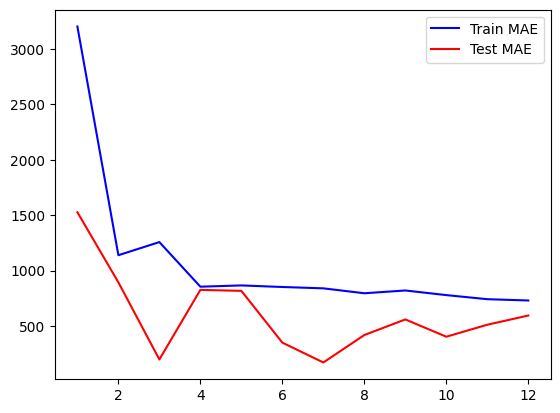

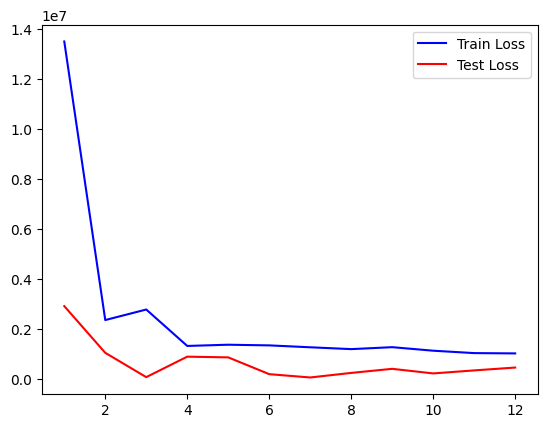

<Figure size 640x480 with 0 Axes>

In [27]:
from keras import initializers
from keras import regularizers
from keras.layers import Dense, Dropout
from keras.callbacks import EarlyStopping


from keras.models import Sequential
from keras.layers import Dense

L1=200
L2=100
L3=50

model = Sequential()
model.add(Dense(L1,input_dim=13,activation='relu',
                kernel_initializer='he_normal', kernel_regularizer= regularizers.l1(0.01)))
model.add(Dropout(rate = 0.2))
model.add(Dense(L2,activation='relu'))
model.add(Dropout(rate = 0.2))
model.add(Dense(L3,activation='relu'))
model.add(Dropout(rate = 0.2))

# output layer 
model.add(Dense(1, activation='linear')) 

#Compiling the sequantial model
model.compile(loss = 'mse', metrics = ['mae'], optimizer = 'adam')

# Stop the model if no improvement seen after 5 times
early_stopping_monitor =EarlyStopping(patience = 5 ) 

history = model.fit(X_train, Y_train, epochs =20, batch_size = 100, validation_data = (X_test, Y_test), callbacks= [early_stopping_monitor])

mae2 = history.history['mae']
val_mae = history.history['val_mae']
loss2 = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(mae2)+1)

plt.plot(epochs, mae2, 'b', label = 'Train MAE')
plt.plot(epochs, val_mae, 'r', label = 'Test MAE')
plt.legend()
plt.figure()

plt.plot(epochs, loss2, 'b', label = 'Train Loss')
plt.plot(epochs, val_loss, 'r', label = 'Test Loss')
plt.legend()
plt.figure()

# Grid Search Hyperparameter

In [28]:
pip install scikeras

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [30]:
from sklearn.model_selection import GridSearchCV
from scikeras.wrappers import KerasClassifier
from scikeras.wrappers import KerasRegressor 

In [31]:
# Function to create model, required for KerasClassifier
def create_model():
  # create model
  model5 = Sequential()
  model5.add(Dense(200,input_dim=13,activation='relu',
                kernel_initializer='he_normal', kernel_regularizer= regularizers.l1(0.01)))
  model5.add(Dense(100, activation='relu'))
  model5.add(Dense(50, activation='relu'))
  model5.add(Dense(1, activation='linear'))

  # Compile model
  model5.compile(loss = 'mse', metrics = ['mae'], optimizer = 'adam')
  return model5


# Tune the Batch Size and Epochs

KerasClassifier should be used when the target variable is categorical or discrete, and KerasRegressor should be used when the target variable is continuous.

Here are some examples:

KerasClassifier can be used for classification tasks such as image classification, text classification, sentiment analysis, or fraud detection where the target variable is a categorical variable.

KerasRegressor can be used for regression tasks such as predicting housing prices, stock prices, or the length of stay in a hospital where the target variable is a continuous variable.

In both cases, the Keras model needs to be appropriately designed and trained to achieve good performance on the task at hand.

In summary, the choice between KerasClassifier and KerasRegressor depends on the nature of the target variable in the problem being addressed.

In [33]:
# create model
model5 = KerasRegressor(model=create_model,
                         verbose=0)

# define the grid search parameter
batch_size = [50,100,128]
epochs = [10,15,20]

# parameter dictionary  for grid search
param_grid = dict(batch_size=batch_size,
                  epochs=epochs)
# cv - number of cross validation 
# n_jobs specifies the number of CPU cores to use during parallel processing.

grid = GridSearchCV(estimator=model5,
                    param_grid=param_grid,
                    n_jobs=-1,cv=3)

grid_result = grid.fit(X_train, Y_train)

In [34]:
# summarize results
print("Best: %f using %s" % (grid_result.best_score_,
                             grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']

for mean, stdev, param in zip(means, stds, params):
  print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.999945 using {'batch_size': 50, 'epochs': 15}
0.998769 (0.000597) with: {'batch_size': 50, 'epochs': 10}
0.999945 (0.000027) with: {'batch_size': 50, 'epochs': 15}
0.999856 (0.000164) with: {'batch_size': 50, 'epochs': 20}
0.989377 (0.009836) with: {'batch_size': 100, 'epochs': 10}
0.996597 (0.000824) with: {'batch_size': 100, 'epochs': 15}
0.999019 (0.000373) with: {'batch_size': 100, 'epochs': 20}
0.985298 (0.012153) with: {'batch_size': 128, 'epochs': 10}
0.994496 (0.005384) with: {'batch_size': 128, 'epochs': 15}
0.998697 (0.000888) with: {'batch_size': 128, 'epochs': 20}


# Tune the Training Optimization Algorithm (Only)

In [36]:
# create model
model6 = KerasRegressor(model=create_model,
                          loss = 'mse',
                         epochs=15, batch_size=50, verbose=0)

# define the grid search parameter
optimizer = ['SGD', 'RMSprop','Adagrad','Adadelta',
             'Adam','Adamax','Nadam']

# parameter dictionary  for grid search
param_grid = dict(optimizer=optimizer)
# cv - number of cross validation 
# n_jobs specifies the number of CPU cores to use during parallel processing.

grid = GridSearchCV(estimator=model6,
                    param_grid=param_grid,
                    n_jobs=-1,cv=3)

grid_result = grid.fit(X_train, Y_train)

In [37]:
# summarize results
print("Best: %f using %s" % (grid_result.best_score_,
                             grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']

for mean, stdev, param in zip(means, stds, params):
  print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.999944 using {'optimizer': 'Adam'}
0.999930 (0.000025) with: {'optimizer': 'SGD'}
0.999907 (0.000056) with: {'optimizer': 'RMSprop'}
0.999863 (0.000086) with: {'optimizer': 'Adagrad'}
0.999624 (0.000029) with: {'optimizer': 'Adadelta'}
0.999944 (0.000034) with: {'optimizer': 'Adam'}
0.999838 (0.000134) with: {'optimizer': 'Adamax'}
0.999742 (0.000250) with: {'optimizer': 'Nadam'}


# Tune the Neuron Activation Function

In [44]:
def create_model(activation='relu'):
  # create model
  model8 = Sequential()
  model8.add(Dense(200,input_dim=13,activation=activation,
                kernel_initializer='he_normal', kernel_regularizer= regularizers.l1(0.01)))
  model8.add(Dense(100, activation=activation))
  model8.add(Dense(50, activation=activation))
  model8.add(Dense(1, activation='linear'))

  # Compile model
  model8.compile(loss = 'mse', metrics = ['mae'], optimizer = 'adam')
  return model8


In [45]:
model8 = KerasRegressor(model=create_model, epochs=15, batch_size=50, verbose=0)  
activation = ['softmax','softplus','softsign','relu','tanh','sigmoid','hard_sigmoid','linear']
param_grid = dict(model__activation=activation)
grid = GridSearchCV(estimator=model8, param_grid=param_grid, n_jobs=-1, cv=3)

grid_result = grid.fit(X_train, Y_train)

In [46]:
# summarize results
print("Best: %f using %s" % (grid_result.best_score_,
                             grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']

for mean, stdev, param in zip(means, stds, params):
  print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.999993 using {'model__activation': 'linear'}
-5.603846 (0.372540) with: {'model__activation': 'softmax'}
0.999914 (0.000031) with: {'model__activation': 'softplus'}
-5.573107 (0.369324) with: {'model__activation': 'softsign'}
0.999810 (0.000233) with: {'model__activation': 'relu'}
-5.569951 (0.370021) with: {'model__activation': 'tanh'}
-5.583933 (0.369324) with: {'model__activation': 'sigmoid'}
-5.582280 (0.368416) with: {'model__activation': 'hard_sigmoid'}
0.999993 (0.000005) with: {'model__activation': 'linear'}


# Final Model

Epoch 1/15
12/12 [==============================] - 1s 16ms/step - loss: 4726885.5000 - mae: 1715.7135 - val_loss: 2952891.5000 - val_mae: 1568.5424
Epoch 2/15
12/12 [==============================] - 0s 6ms/step - loss: 1053548.6250 - mae: 831.3517 - val_loss: 899214.1875 - val_mae: 854.5438
Epoch 3/15
12/12 [==============================] - 0s 5ms/step - loss: 299127.9375 - mae: 449.9460 - val_loss: 148495.9062 - val_mae: 351.7751
Epoch 4/15
12/12 [==============================] - 0s 6ms/step - loss: 79781.0781 - mae: 235.7989 - val_loss: 28.8967 - val_mae: 3.8569
Epoch 5/15
12/12 [==============================] - 0s 4ms/step - loss: 22371.6934 - mae: 115.9146 - val_loss: 16540.6543 - val_mae: 116.3708
Epoch 6/15
12/12 [==============================] - 0s 6ms/step - loss: 7465.9761 - mae: 71.3981 - val_loss: 1881.0293 - val_mae: 38.8857
Epoch 7/15
12/12 [==============================] - 0s 5ms/step - loss: 1968.2404 - mae: 35.7372 - val_loss: 1928.0166 - val_mae: 40.0055
Epoch 8

<Figure size 640x480 with 0 Axes>

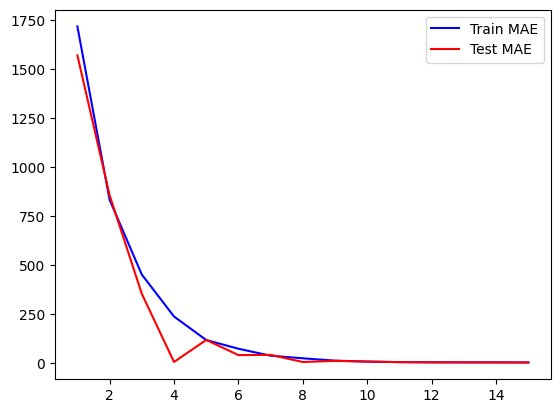

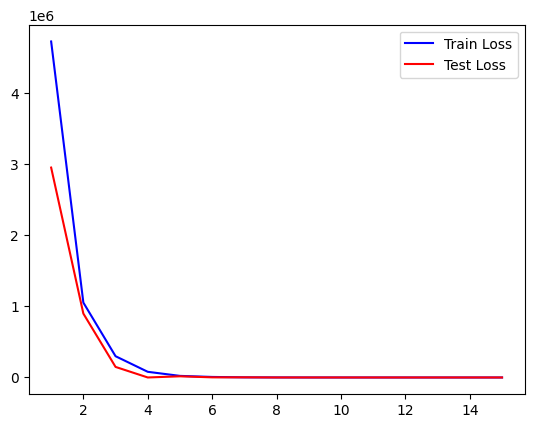

<Figure size 640x480 with 0 Axes>

In [47]:
L1=200
L2=100
L3=50

model = Sequential()
model.add(Dense(L1,input_dim=13,activation='linear',
                kernel_initializer='he_normal', kernel_regularizer= regularizers.l1(0.01))) #input dimension equal to pixel
model.add(Dense(L2,activation='linear'))
model.add(Dense(L3,activation='linear'))

# output layer 
model.add(Dense(1, activation='linear')) 

#Compiling the sequantial model
model.compile(loss = 'mse', metrics = ['mae'], optimizer = 'adam')

history = model.fit(X_train, Y_train, epochs =15, batch_size = 50, validation_data = (X_test, Y_test))

mae2 = history.history['mae']
val_mae = history.history['val_mae']
loss2 = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(mae2)+1)

plt.plot(epochs, mae2, 'b', label = 'Train MAE')
plt.plot(epochs, val_mae, 'r', label = 'Test MAE')
plt.legend()
plt.figure()

plt.plot(epochs, loss2, 'b', label = 'Train Loss')
plt.plot(epochs, val_loss, 'r', label = 'Test Loss')
plt.legend()
plt.figure()